In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Datasets/BlackFriday.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df_test = pd.read_csv("D:\TANUJ\B.Tech\Sem-7\Revision\Practice ML\Datasets\BlackFridaytest.csv")
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
print(df.shape)
df = pd.concat([df,df_test])
df.shape

(550068, 12)


(783667, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [6]:
df = df.drop(['User_ID'],axis=1)

In [7]:
# pd.get_dummies(df['Gender'],drop_first=True)

In [8]:
### categorical age and gender 

df['Gender'] = df['Gender'].map({"F":0,"M":1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [9]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [10]:
df["Age"] =  df['Age'].map({"0-17":1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [11]:
# from sklearn import preprocessing

# label_encoder = preprocessing.LabelEncoder()
# df['species']= label_encoder.fit_transform(df['species'])

# df['species'].unique()

In [12]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [13]:
df["City_Category"] =  df['City_Category'].map({"A":1,'B':2,'C':3})

In [14]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [15]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [16]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [17]:
### replace with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [18]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [19]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [20]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

In [21]:
df['Purchase'].unique()

array([ 8370., 15200.,  1422., ...,   123.,   613.,    nan])

In [22]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [23]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

In [24]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,8.0,16.0,8370.0
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,8.0,16.0,1422.0
3,P00085442,0,1,10,1,2,0,12,14.0,16.0,1057.0
4,P00285442,1,7,16,3,4,0,8,8.0,16.0,7969.0


### Note 
Need to change above column to int


In [25]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int32  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int32(1), int64(6), object(1)
memory usage: 68.8+ MB


<Axes: xlabel='Age', ylabel='Purchase'>

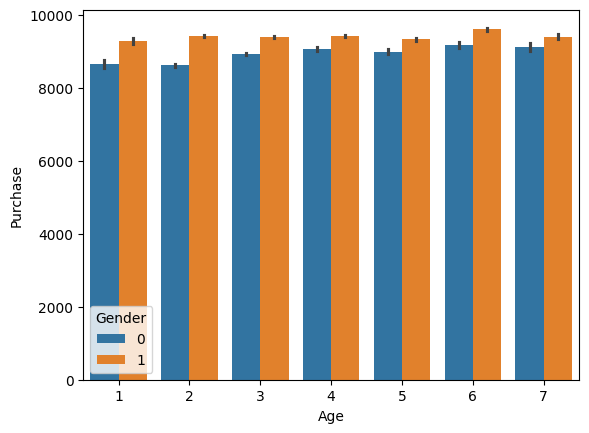

In [27]:
sns.barplot(x="Age",y='Purchase', hue='Gender', data = df)

In [28]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,8.0,16.0,8370.0
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,8.0,16.0,1422.0
3,P00085442,0,1,10,1,2,0,12,14.0,16.0,1057.0
4,P00285442,1,7,16,3,4,0,8,8.0,16.0,7969.0


In [29]:
df = df.drop(['Product_ID'],axis=1)

In [30]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,1,2,0,3,8.0,16.0,8370.0
1,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,0,1,10,1,2,0,12,8.0,16.0,1422.0
3,0,1,10,1,2,0,12,14.0,16.0,1057.0
4,1,7,16,3,4,0,8,8.0,16.0,7969.0


In [31]:
Name,age,height,is_sudent = "Ayushi",21,160.5,True

In [32]:
Name

'Ayushi'

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
dtypes: float64(3), int32(1), int64(6)
memory usage: 62.8 MB


<Axes: xlabel='Age', ylabel='Purchase'>

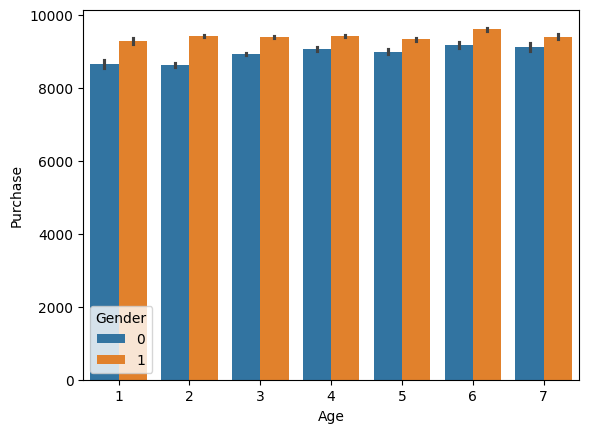

In [35]:
sns.barplot(data = df,x='Age',y ='Purchase',hue='Gender')

<Axes: xlabel='Occupation', ylabel='Purchase'>

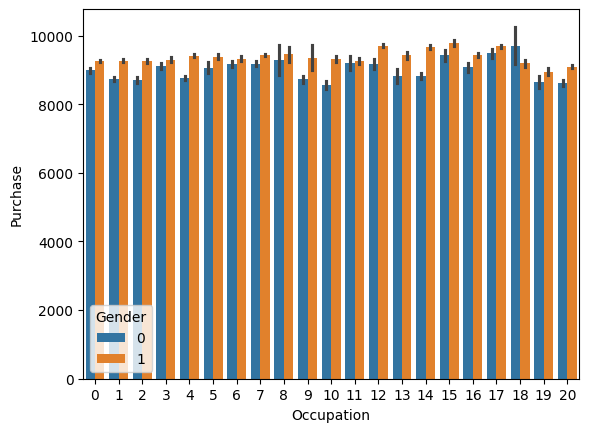

In [36]:
## Visualization of Purchase with occupation
sns.barplot(data = df,x='Occupation',y = 'Purchase',hue='Gender')

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

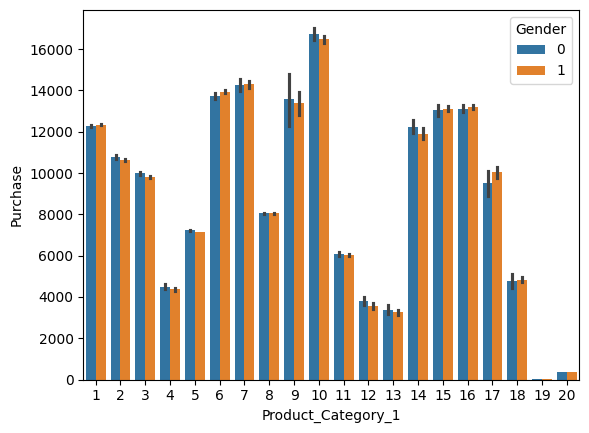

In [37]:
sns.barplot(data = df,x= 'Product_Category_1',y= 'Purchase',hue='Gender')


<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

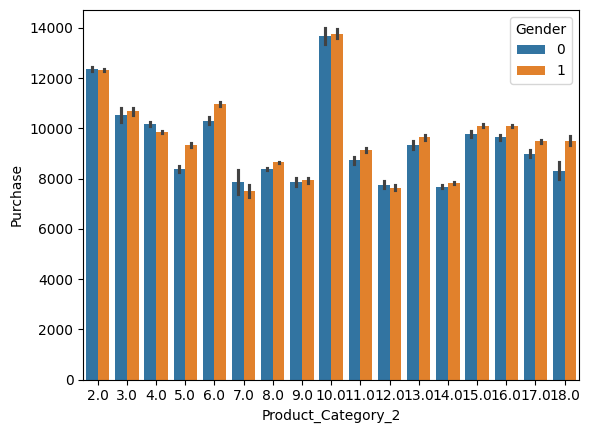

In [38]:
sns.barplot(data = df,x = 'Product_Category_2',y = 'Purchase',hue='Gender')


<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

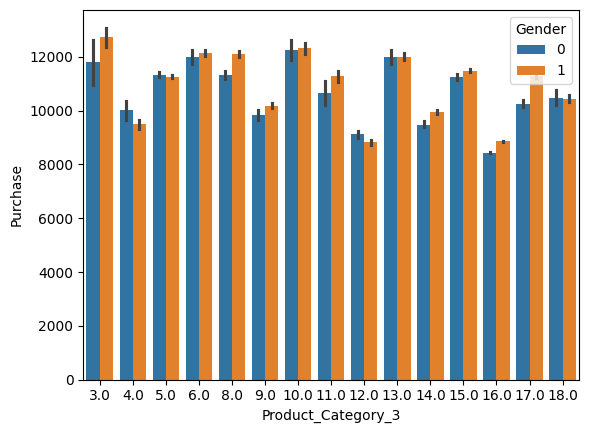

In [41]:
sns.barplot(data=df,x = 'Product_Category_3',y = 'Purchase',hue='Gender')


In [42]:
df_test = df[df['Purchase'].isnull()]

In [43]:
df_train = df[~df['Purchase'].isnull()]

In [44]:
X = df_train.drop('Purchase',axis=1)

In [45]:
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,1,10,1,2,0,3,8.0,16.0
1,0,1,10,1,2,0,1,6.0,14.0
2,0,1,10,1,2,0,12,8.0,16.0
3,0,1,10,1,2,0,12,14.0,16.0
4,1,7,16,3,4,0,8,8.0,16.0


In [46]:
y = df_train['Purchase']

In [47]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.33)

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)